In [70]:
%matplotlib inline
import numpy as np
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

# Histogramas de Luminancia

## Ejercicios

1. Generar el Histograma de Luminancia para una imagen dada. Generarlo utilizando:

   1. 10
   2. 20
   3. 50

In [125]:
image = np.array(Image.open('data/ecocentro.jpg'))

In [142]:
from image_manip import normalize

def generate_luminance_histogram(image, n_intervals=10):
    # Generate Y values for image
    
    def reduce(pixel):
        r, g, b = pixel
        return .299*r + .587*g + .114*b

    def get_y_values(image):
        """Return y values from an image
        
        Returns an array, where each value is the
        Y value for each pixel, where the Y value
        for the (i,j) pixel is in the position
        w*i + j with w equal to the width of the image
        """
        normalized_image = normalize(image)
        return np.array(np.apply_along_axis(func1d=reduce, axis=2, arr=normalized_image).flat)
    
    def plot_histogram(image, values, n_intervals):
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    
        heights, bins = np.histogram(y_values, bins=n_intervals)

        percent = [h/number_of_pixels for h in heights]

        ax[1].bar(bins[:-1], percent,width=1/n_intervals, align='edge', edgecolor="black")

        ax[1].set_ylim(0,1)
        ax[1].set_xlim(0,1)
        ax[1].set_yticks(np.arange(0,1.1, step=.1))
        ax[1].grid(True)
        ax[0].imshow(image)
        plt.show()
    
        
    y_values = get_y_values(image)
    number_of_pixels = len(y_values)
        
    plot_histogram(image, y_values, n_intervals)
    
def generate_luminance_histogram_from_path(image_path, n_intervals):
    generate_luminance_histogram(np.array(Image.open(image_path)), n_intervals)

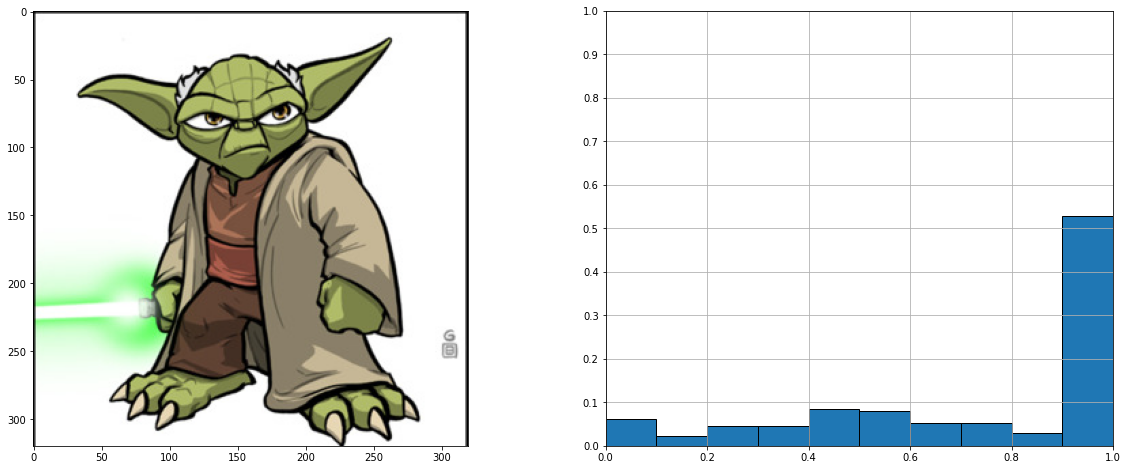

In [143]:
generate_luminance_histogram_from_path('data/yoda.jpg',n_intervals=10)

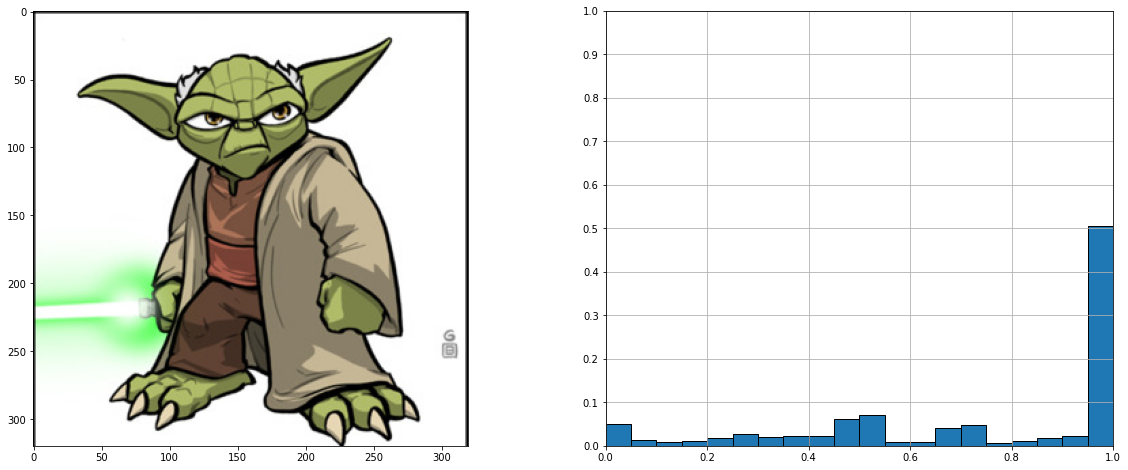

In [147]:
generate_luminance_histogram_from_path('data/yoda.jpg',n_intervals=20)

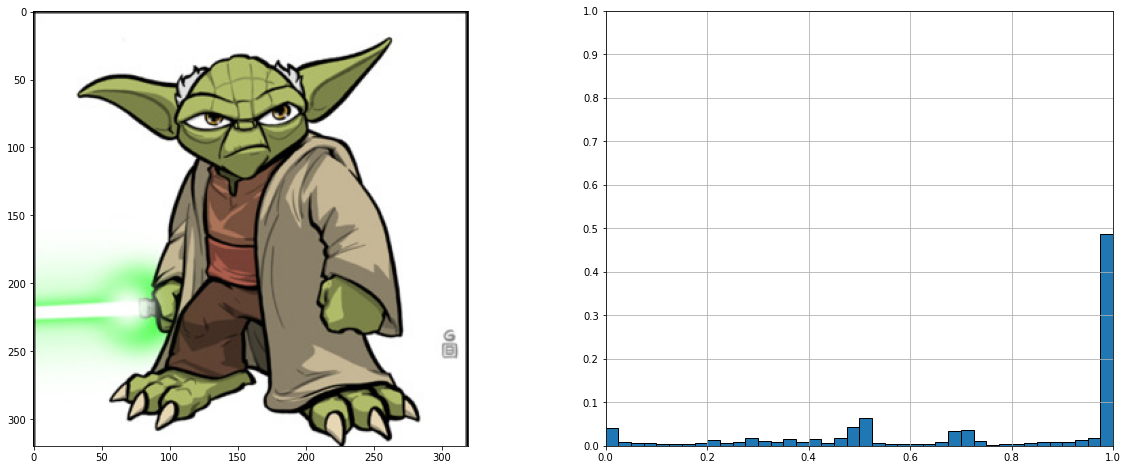

In [148]:
generate_luminance_histogram_from_path('data/yoda.jpg',n_intervals=40)